In [1]:
import pandas as pd

In [2]:
BASE_PATH = '/kaggle/input/csiro-biomass/'
TRAIN_CSV_PATH = BASE_PATH + 'train.csv'
TEST_CSV_PATH = BASE_PATH + 'test.csv'

df_train = pd.read_csv(TRAIN_CSV_PATH)
df_test = pd.read_csv(TEST_CSV_PATH)

display(df_train)

display(df_test)


,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750
...,...,...,...,...,...,...,...,...,...
1780,ID983582017__Dry_Clover_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Clover_g,0.0000
1781,ID983582017__Dry_Dead_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Dead_g,0.0000
1782,ID983582017__Dry_Green_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Green_g,40.9400
1783,ID983582017__Dry_Total_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Total_g,40.9400


,sample_id,image_path,target_name
0,ID1001187975__Dry_Clover_g,test/ID1001187975.jpg,Dry_Clover_g
1,ID1001187975__Dry_Dead_g,test/ID1001187975.jpg,Dry_Dead_g
2,ID1001187975__Dry_Green_g,test/ID1001187975.jpg,Dry_Green_g
3,ID1001187975__Dry_Total_g,test/ID1001187975.jpg,Dry_Total_g
4,ID1001187975__GDM_g,test/ID1001187975.jpg,GDM_g


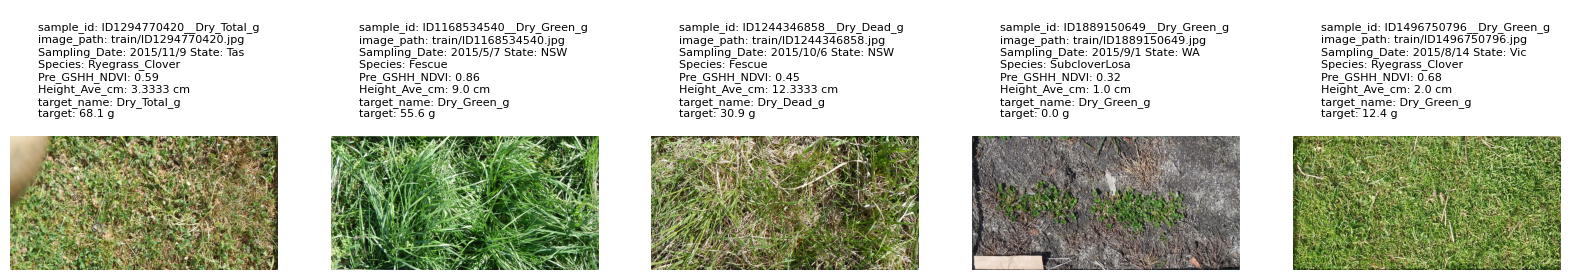

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sample_rows = df_train.sample(5)


plt.figure(figsize=(20, 5))
for i, (idx, row) in enumerate(sample_rows.iterrows()):
    # Construct the full path to the images
    full_path = BASE_PATH + row['image_path']
    
    img = Image.open(full_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"""
        sample_id: {row['sample_id']}
        image_path: {row['image_path']}
        Sampling_Date: {row['Sampling_Date']} State: {row['State']}
        Species: {row['Species']}
        Pre_GSHH_NDVI: {row['Pre_GSHH_NDVI']}
        Height_Ave_cm: {row['Height_Ave_cm']} cm
        target_name: {row['target_name']}
        target: {row['target']:.1f} g
        """, loc='left', fontsize=(8))
    plt.axis('off')

plt.show()


<Axes: xlabel='Pre_GSHH_NDVI', ylabel='target'>

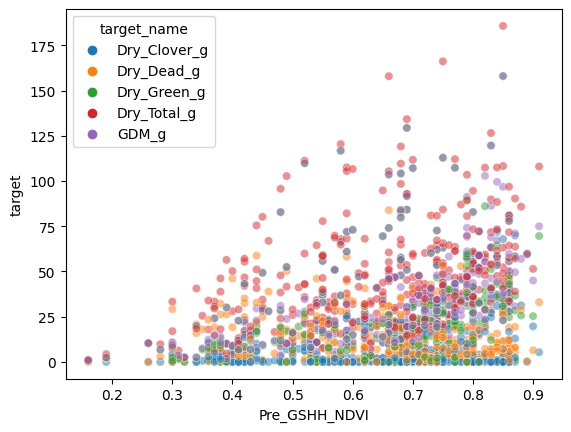

In [4]:
sns.scatterplot(data=df_train, x = 'Pre_GSHH_NDVI', y='target',hue='target_name', alpha=0.5)

In [5]:
target_by_name = df_train.groupby('target_name')['target'].mean().reset_index()
target_by_name

,target_name,target
0,Dry_Clover_g,6.649692
1,Dry_Dead_g,12.044548
2,Dry_Green_g,26.624722
3,Dry_Total_g,45.318097
4,GDM_g,33.274414


In [6]:
df_submission = df_test.merge(
    target_by_name,
    on ='target_name',
    how='left'
)[["sample_id","target"]]

df_submission

,sample_id,target
0,ID1001187975__Dry_Clover_g,6.649692
1,ID1001187975__Dry_Dead_g,12.044548
2,ID1001187975__Dry_Green_g,26.624722
3,ID1001187975__Dry_Total_g,45.318097
4,ID1001187975__GDM_g,33.274414


In [7]:
df_submission.to_csv('submission.csv',index=False)